In [ ]:
!wget http://images.cocodataset.org/zips/train2014.zip
!wget http://images.cocodataset.org/annotations/annotations_trainval2014.zip
!wget http://images.cocodataset.org/zips/val2014.zip

In [ ]:
!unzip annotations_trainval2014.zip
!unzip train2014.zip
!unzip val2014.zip

In [ ]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from PIL import Image
import os
import glob
import cv2
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as tvt
import torch.nn as nn
import torch.nn.functional as F
import seaborn as sns

Getting training Images

In [ ]:
dataType='train2014'
annFile='annotations/instances_{}.json'.format(dataType)

coco=COCO(annFile)

cats = coco.loadCats(coco.getCatIds())

loading annotations into memory...
Done (t=11.59s)
creating index...
index created!


In [ ]:
def makeImage(getFilterClass , count):
  catIds = coco.getCatIds(catNms=getFilterClass)
  imgIds = coco.getImgIds(catIds=catIds )
  img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
  I = 'train2014/{}'.format(img['file_name'])
  picture = Image.open(I)
  picture

  for i in range(0,count):
    img = coco.loadImgs(imgIds[i])[0]
    I = 'train2014/{}'.format(img['file_name'])
    picture = Image.open(I)
    im_resized = picture.resize((64, 64), Image.BOX)
    if getFilterClass == 'airplane':
      path = 'Dataset/Train/Airplane/'
      name = img['file_name']
      p = os.path.join(path,name)
      im_resized = im_resized.save(p)
    if getFilterClass == 'bus':
      path = 'Dataset/Train/Bus/'
      name = img['file_name']
      p = os.path.join(path,name)

      im_resized = im_resized.save(p)
    if getFilterClass == 'cat':
      path = 'Dataset/Train/Cat/'
      name = img['file_name']
      p = os.path.join(path,name)
      im_resized = im_resized.save(p)
    if getFilterClass == 'dog':
      path = 'Dataset/Train/Dog/'
      name = img['file_name']
      p = os.path.join(path,name)
      im_resized = im_resized.save(p)
    if getFilterClass == 'pizza':
      path = 'Dataset/Train/Pizza/'
      name = img['file_name']
      p = os.path.join(path,name)
      im_resized = im_resized.save(p)


In [ ]:
makeImage('airplane' , 1500)
makeImage('bus' , 1500)
makeImage('cat' , 1500)
makeImage('dog' , 1500)
makeImage('pizza' , 1500)

In [ ]:
class CustomDataset_Val(Dataset):
  def __init__(self , root):
    self.root = root
    self.data = []

    for images in glob.glob(self.root + "Val/Dog/*.jpg"):
      self.data.append([images,3])

    #for images in glob.glob(self.root + "Train/Airplane/*.jpg"):
    #  self.data.append([images,0])

   # for images in glob.glob(self.root + "Train/Bus/*.jpg"):
   #   self.data.append([images,1])

    for images in glob.glob(self.root + "Val/Airplane/*.jpg"):
      self.data.append([images,0])

    #for images in glob.glob(self.root + "Train/Cat/*.jpg"):
    #  self.data.append([images,2])

    for images in glob.glob(self.root + "Val/Bus/*.jpg"):
      self.data.append([images,1])

    for images in glob.glob(self.root + "Val/Pizza/*.jpg"):
      self.data.append([images,4])

    #for images in glob.glob(self.root + "Train/Dog/*.jpg"):
    #  self.data.append([images,3])

    #for images in glob.glob(self.root + "Train/Pizza/*.jpg"):
    #  self.data.append([images,4])

    for images in glob.glob(self.root + "Val/Cat/*.jpg"):
      self.data.append([images,2])





    #print(self.data)

  def __len__(self):
    return len(self.data)

  def __getitem__(self, index):
    path , ans = self.data[index]
    #print(path)
    #print(ans)

    img = Image.open(path).convert('RGB')
    #img
    tensor_transform = tvt.Compose([
    tvt.ToTensor()
    ])

    img = tensor_transform(img)
    return img , ans

In [ ]:
class CustomDataset_Train(Dataset):
  def __init__(self , root):
    self.root = root
    self.data = []



    for images in glob.glob(self.root + "Train/Airplane/*.jpg"):
      self.data.append([images,0])

    for images in glob.glob(self.root + "Train/Bus/*.jpg"):
      self.data.append([images,1])




    for images in glob.glob(self.root + "Train/Cat/*.jpg"):
      self.data.append([images,2])





    for images in glob.glob(self.root + "Train/Dog/*.jpg"):
      self.data.append([images,3])

    for images in glob.glob(self.root + "Train/Pizza/*.jpg"):
      self.data.append([images,4])







    #print(self.data)

  def __len__(self):
    return len(self.data)

  def __getitem__(self, index):
    path , ans = self.data[index]
    #print(path)
    #print(ans)

    img = Image.open(path).convert('RGB')
    #img
    tensor_transform = tvt.Compose([
    tvt.ToTensor()
    ])

    img = tensor_transform(img)
    return img , ans

Getting Validation Images

In [ ]:
dataType='val2014'
annFile='annotations/instances_{}.json'.format(dataType)
coco=COCO(annFile)
cats = coco.loadCats(coco.getCatIds())


def valImage(getFilterClass , count):
  catIds = coco.getCatIds(catNms=getFilterClass)
  imgIds = coco.getImgIds(catIds=catIds )


  for i in range(0,count):
    img = coco.loadImgs(imgIds[i])[0]
    I = 'val2014/{}'.format(img['file_name'])
    picture = Image.open(I)
    im_resized = picture.resize((64, 64), Image.BOX)
    if getFilterClass == 'airplane':
      path = 'Dataset/Val/Airplane/'
      name = img['file_name']
      p = os.path.join(path,name)
      im_resized = im_resized.save(p)
    if getFilterClass == 'bus':
      path = 'Dataset/Val/Bus/'
      name = img['file_name']
      p = os.path.join(path,name)

      im_resized = im_resized.save(p)
    if getFilterClass == 'cat':
      path = 'Dataset/Val/Cat/'
      name = img['file_name']
      p = os.path.join(path,name)
      im_resized = im_resized.save(p)
    if getFilterClass == 'dog':
      path = 'Dataset/Val/Dog/'
      name = img['file_name']
      p = os.path.join(path,name)
      im_resized = im_resized.save(p)
    if getFilterClass == 'pizza':
      path = 'Dataset/Val/Pizza/'
      name = img['file_name']
      p = os.path.join(path,name)
      im_resized = im_resized.save(p)



valImage('airplane' , 500)
valImage('bus' , 500)
valImage('cat' , 500)
valImage('dog' , 500)
valImage('pizza' , 500)

loading annotations into memory...
Done (t=6.73s)
creating index...
index created!



Another implementation -- Check

In [ ]:
class patch_Embedding(nn.Module):
  def __init__(self, img_size , c , patching , embedding_size = 256):
    self.img_size = img_size
    self.patching = patching
    self.in_channel = c

    self.num_patches = (img_size // patching) ** 2

    self.make_patch = nn.Conv2d(c, embedding_size , kernel = patching , stride = patching)

  def forward(self , x):
    output = self.make_patch(x)
    output = output.flatten(2)
    output = output.transpose(1,2)

    return output




Transformer block

Main Block

In [ ]:
class

In [ ]:
class MyMSA(nn.Module):
    def __init__(self, d, n_heads=2):
        super(MyMSA, self).__init__()
        self.d = d
        self.n_heads = n_heads

        assert d % n_heads == 0, f"Can't divide dimension {d} into {n_heads} heads"

        d_head = int(d / n_heads)
        self.q_mappings = nn.ModuleList([nn.Linear(d_head, d_head) for _ in range(self.n_heads)])
        self.k_mappings = nn.ModuleList([nn.Linear(d_head, d_head) for _ in range(self.n_heads)])
        self.v_mappings = nn.ModuleList([nn.Linear(d_head, d_head) for _ in range(self.n_heads)])
        self.d_head = d_head
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, sequences):
        # Sequences has shape (N, seq_length, token_dim)
        # We go into shape    (N, seq_length, n_heads, token_dim / n_heads)
        # And come back to    (N, seq_length, item_dim)  (through concatenation)
        result = []
        for sequence in sequences:
            seq_result = []
            for head in range(self.n_heads):
                q_mapping = self.q_mappings[head]
                k_mapping = self.k_mappings[head]
                v_mapping = self.v_mappings[head]

                seq = sequence[:, head * self.d_head: (head + 1) * self.d_head]
                q, k, v = q_mapping(seq), k_mapping(seq), v_mapping(seq)

                attention = self.softmax(q @ k.T / (self.d_head ** 0.5))
                seq_result.append(attention @ v)
            result.append(torch.hstack(seq_result))
        return torch.cat([torch.unsqueeze(r, dim=0) for r in result])


class MyViTBlock(nn.Module):
    def __init__(self, hidden_d, n_heads, mlp_ratio=4):
        super(MyViTBlock, self).__init__()
        self.hidden_d = hidden_d
        self.n_heads = n_heads

        self.norm1 = nn.LayerNorm(hidden_d)
        self.mhsa = MyMSA(hidden_d, n_heads)
        self.norm2 = nn.LayerNorm(hidden_d)
        self.mlp = nn.Sequential(
            nn.Linear(hidden_d, mlp_ratio * hidden_d),
            nn.GELU(),
            nn.Linear(mlp_ratio * hidden_d, hidden_d)
        )

    def forward(self, x):
        out = x + self.mhsa(self.norm1(x))
        out = out + self.mlp(self.norm2(out))
        return out

In [ ]:
class MyViT(nn.Module):
    def __init__(self, chw, n_patches=8, n_blocks=2, hidden_d=8, n_heads=2, out_d=5):
        # Super constructor
        super(MyViT, self).__init__()

        # Attributes
        self.chw = chw # ( C , H , W )
        self.n_patches = n_patches
        self.n_blocks = n_blocks
        self.n_heads = n_heads
        self.hidden_d = hidden_d

        # Input and patches sizes
        assert chw[1] % n_patches == 0, "Input shape not entirely divisible by number of patches"
        assert chw[2] % n_patches == 0, "Input shape not entirely divisible by number of patches"
        self.patch_size = (chw[1] / n_patches, chw[2] / n_patches)

        # 1) Linear mapper
        self.input_d = int(chw[0] * self.patch_size[0] * self.patch_size[1])
        self.linear_mapper = nn.Linear(self.input_d, self.hidden_d)

        # 2) Learnable classification token
        self.class_token = nn.Parameter(torch.rand(1, self.hidden_d))

        # 3) Positional embedding
        self.register_buffer('positional_embeddings', get_positional_embeddings(n_patches ** 2 + 1, hidden_d), persistent=False)

        # 4) Transformer encoder blocks
        self.blocks = nn.ModuleList([MyViTBlock(hidden_d, n_heads) for _ in range(n_blocks)])

        # 5) Classification MLPk
        self.mlp = nn.Sequential(
            nn.Linear(self.hidden_d, out_d),
            nn.Softmax(dim=-1)
        )

    def forward(self, images):
        # Dividing images into patches
        n, c, h, w = images.shape
        patches = patchify(images, self.n_patches).to(self.positional_embeddings.device)

        # Running linear layer tokenization
        # Map the vector corresponding to each patch to the hidden size dimension
        tokens = self.linear_mapper(patches)

        # Adding classification token to the tokens
        tokens = torch.cat((self.class_token.expand(n, 1, -1), tokens), dim=1)

        # Adding positional embedding
        out = tokens + self.positional_embeddings.repeat(n, 1, 1)

        # Transformer Blocks
        for block in self.blocks:
            out = block(out)

        # Getting the classification token only
        out = out[:, 0]

        return self.mlp(out) # Map to output dimension, output category distribution



def get_positional_embeddings(sequence_length, d):
    result = torch.ones(sequence_length, d)
    for i in range(sequence_length):
        for j in range(d):
            result[i][j] = np.sin(i / (10000 ** (j / d))) if j % 2 == 0 else np.cos(i / (10000 ** ((j - 1) / d)))
    return result

In [ ]:
dataset = CustomDataset_Train("Dataset/")
data_loader = DataLoader(dataset, batch_size=100 , shuffle = True)

In [ ]:
import tqdm
model = MyViT((3, 64, 64), n_patches=8, n_blocks=2, hidden_d=8, n_heads=2, out_d=5).cuda()
N_EPOCHS = 20
LR = 0.005

    # Training loop
optimizer = torch.optim.Adam(model.parameters(), lr=LR)
criterion = torch.nn.CrossEntropyLoss()
loss_iter_2 = []
for epoch in range(N_EPOCHS):
  running_loss = 0.0
  for i, data in enumerate(data_loader):
    inputs , labels = data
    inputs = inputs.cuda()
    labels = labels.cuda()
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs , labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
    if (i+1) % 10 == 0:
      print("[epoch: %d, batch: %5d] loss: %.3f"  % (epoch + 1, i + 1, running_loss / 10))
      loss_iter_2.append(running_loss/10)
      running_loss = 0.0

[epoch: 1, batch:    10] loss: 1.609
[epoch: 1, batch:    20] loss: 1.594
[epoch: 1, batch:    30] loss: 1.524
[epoch: 1, batch:    40] loss: 1.475
[epoch: 1, batch:    50] loss: 1.467
[epoch: 1, batch:    60] loss: 1.480
[epoch: 1, batch:    70] loss: 1.462
[epoch: 2, batch:    10] loss: 1.457
[epoch: 2, batch:    20] loss: 1.450
[epoch: 2, batch:    30] loss: 1.456
[epoch: 2, batch:    40] loss: 1.452
[epoch: 2, batch:    50] loss: 1.427
[epoch: 2, batch:    60] loss: 1.416
[epoch: 2, batch:    70] loss: 1.441
[epoch: 3, batch:    10] loss: 1.463
[epoch: 3, batch:    20] loss: 1.435
[epoch: 3, batch:    30] loss: 1.459
[epoch: 3, batch:    40] loss: 1.455
[epoch: 3, batch:    50] loss: 1.429
[epoch: 3, batch:    60] loss: 1.430
[epoch: 3, batch:    70] loss: 1.435
[epoch: 4, batch:    10] loss: 1.417
[epoch: 4, batch:    20] loss: 1.445
[epoch: 4, batch:    30] loss: 1.418
[epoch: 4, batch:    40] loss: 1.426
[epoch: 4, batch:    50] loss: 1.414
[epoch: 4, batch:    60] loss: 1.397
[

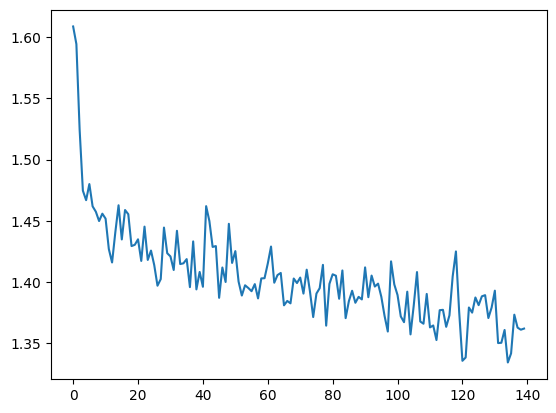

In [ ]:
plt.plot(loss_iter_2)

In [ ]:
dataset = CustomDataset_Val("Dataset/")
val_loader = DataLoader(dataset, batch_size=100 , shuffle = True)

In [ ]:
con_matrix = torch.zeros(5, 5)
model.eval()
for i, data in enumerate(val_loader):
  input, label = data
  input = input.cuda()
  label = label.cuda()
  output = model(input)
  _, pred = torch.max(output.data , 1)
  pred = pred.tolist()
  for label,pred in zip(label,pred):
    con_matrix[label][pred] += 1

0.5052000284194946


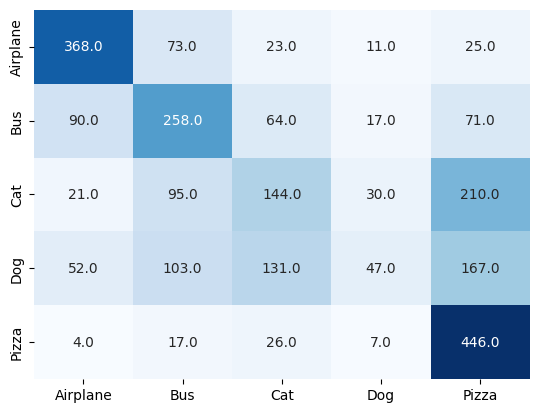

In [ ]:
classes = ["Airplane" , "Bus" , "Cat", "Dog", "Pizza"]
sns.heatmap(con_matrix,annot = True, fmt = "" , cmap = "Blues" , cbar = False,
xticklabels = classes, yticklabels = classes)

acc_1  = ((torch.trace(con_matrix))/float(torch.sum(con_matrix))).item()
print(acc_1)